In [1]:
using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO
using Pkg
using LaTeXStrings

-------------------

## convergence limit $10^{-7}$

In [2]:
conv_lim = [1e-7]
n_iterations_between_checks = 500



500

In [3]:
superdigits(n) = join(getindex.(
    ["⁰","¹","²","³","⁴","⁵","⁶","⁷","⁸","⁹"],
    digits(n) .+ 1
))

superdigits (generic function with 1 method)

In [15]:
c = [[5.51e-6, 5.23e-6, 4.97e-6, 1.68e-6,1.40e-6],
    [5.03e-6, 4.40e-6, 4.00e-6, 1.22e-6, 1.04e-6],
    [3.19e-6, 3.08e-6, 2.98e-6, 7.74e-7, 7.15e-7],
    [3.08e-6, 2.86e-6, 2.74e-6, 6.25e-7, 5.36e-7],
    [1.96e-6, 1.19e-6, 1.07e-6, 2.38e-7, 2.98e-7],
    [1.19e-6, 1.07e-6, 7.74e-7, 1.19e-7, 5.98e-8],
    [1.01e-6, 9.53e-7, 7.74e-7, 1.19e-7, 1.86e-9],
    [1.15e-6, 8.94e-7, 8.94e-7, 1.19e-7, 1.445e-11],
    [1.07e-6, 8.94e-7, 1.07e-6, 1.19e-7, 7.27e-12]]
n_iterations_between_checks = [500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000];
converged_iters = Set([30000, 40000, 50000, 60000])

refinement = [1, 0.2, 0.1, 0.05, 0.02]


5-element Vector{Float64}:
 1.0
 0.2
 0.1
 0.05
 0.02

In [16]:
@show length(refinement)
@show length.(c)


length(refinement) = 5
length.(c) = [5, 5, 5, 5, 5, 5, 5, 5, 5]


9-element Vector{Int64}:
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [17]:
palette = :Dark2
default(fontfamily = "Computer Modern", linewidth = 2)

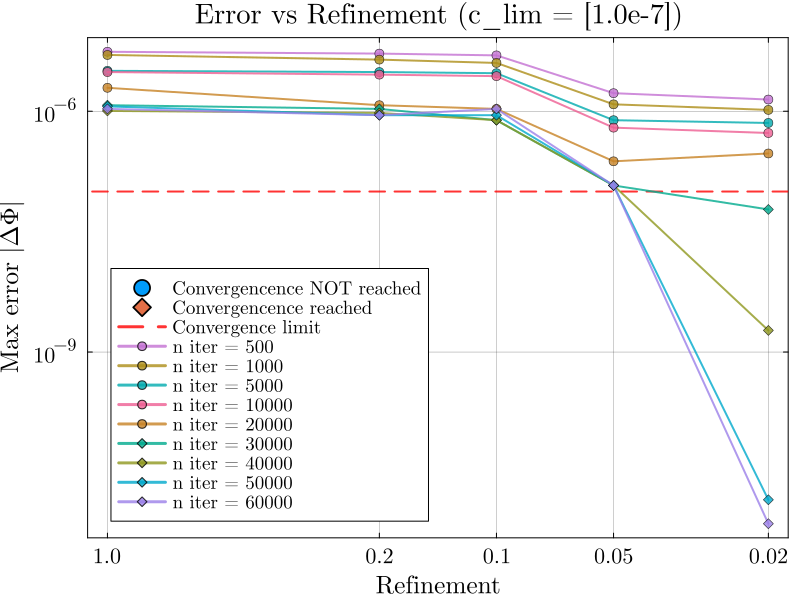

In [35]:
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 12,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true,
    color = palette,
)
# due voci nella legenda dedicate ai marker
scatter!(p, [NaN], [NaN],
    marker = :circle,
    label = "Convergencence NOT reached",
    markersize = 6,
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    label = "Convergencence reached",
    markersize = 6,
)
# linea limite
hline!(p, [1e-7],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(n_iterations_between_checks)

    iter = n_iterations_between_checks[i]

    markerstyle = iter in converged_iters ? :diamond : :circle

    plot!(p,
        refinement,
        c[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_10-7.png")
p


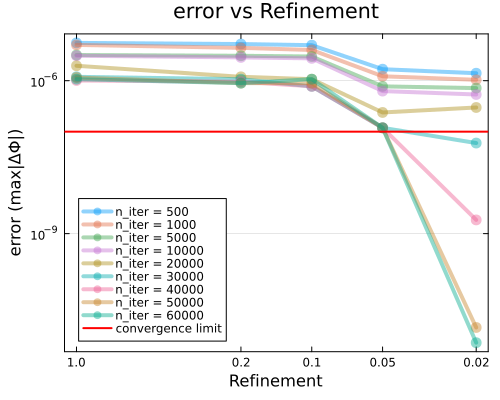

In [92]:
plot(
    xlabel = "Refinement",
    ylabel = "error (max|ΔΦ|)",
    title = "error vs Refinement",
    legend = :bottomleft,
    size = (500, 400),        # immagine più grande
    framestyle = :box,        # bordi chiusi
    xscale = :log10,
    yscale = :log10,
    xticks = xticks = (refinement, [r for r in refinement])
)

for i in 1:length(n_iterations_between_checks)
    plot!(
        refinement,
        c[i],
        label = "n_iter = $(n_iterations_between_checks[i])",
        lw = 4,
        alpha = 0.43,
        marker = :circle,
        markersize = 6,
        markerstrokecolor = :transparent,
        markerstrokewidth = 0,
    )
end

hline!([1e-7],
    color = :red,
    lw = 2,
    label = "convergence limit"
)

xflip!()


---------

## convergence limit $10^{-8}$

In [ ]:
c_8 = [[3.37e-6, 3.16e-6, 3.17e-6, 8.49e-7, 7.75e-7],
    [ 1.37e-6, 1.19e-6, 1.07e-6, 2.38e-7, 1.19e-7 ],
    [1.01e-6, 8.9e-7,  8.9e-7, 1.19e-7, 5.9e-8 ]
]

3-element Vector{Vector{Float64}}:
 [3.37e-6, 3.16e-6, 3.17e-6, 8.49e-7, 7.75e-7]
 [1.37e-6, 1.19e-6, 1.07e-6, 1.19e-7, 2.38e-7]
 [1.01e-6, 8.9e-7, 8.9e-7, 1.19e-7, 5.9e-8]

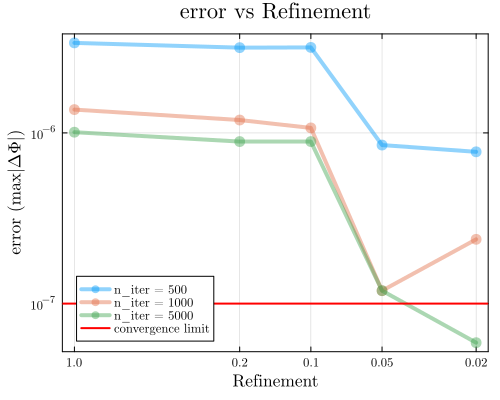

In [41]:
plot(
    xlabel = "Refinement",
    ylabel = "error (max|ΔΦ|)",
    title = "error vs Refinement",
    legend = :bottomleft,
    size = (500, 400),        # immagine più grande
    framestyle = :box,        # bordi chiusi
    xscale = :log10,
    yscale = :log10,
    xticks = xticks = (refinement, [r for r in refinement])
)

for i in 1:length(c_8)
    plot!(
        refinement,
        c_8[i],
        label = "n_iter = $(n_iterations_between_checks[i])",
        lw = 4,
        alpha = 0.43,
        marker = :circle,
        markersize = 6,
        markerstrokecolor = :transparent,
        markerstrokewidth = 0,
    )
end

hline!([1e-7],
    color = :red,
    lw = 2,
    label = "convergence limit"
)

xflip!()


In [101]:
using Statistics  # serve per la funzione mean

valori = [2.14e-6, 2.32e-6, 2.205e-6, 2.026e-6]
mean_c = mean(valori)
std_C =  std(valori)

println(std_C)



1.2292375685765533e-7
